# 今回の取り組み

## 一度、CUIの動作を確認します

これから5月末までになにをまとめるべきかを洗い出すために、一連の動作を確認します

## いつものセットアップ

In [17]:
# ルートディレクトリをPathに含めるおまじない
import sys, os
from pathlib import Path
if Path().absolute().stem != "DAJIN2":
    parent_path = str(Path(os.path.dirname(os.path.abspath("__file__"))).parent.parent)
    os.chdir(parent_path)

print(os.getcwd())
sys.path.append(os.getcwd() + "/src")

/mnt/d/Research/DAJIN2


In [2]:
%%bash
# pipの更新
pip install -q -U pip
pip install -q -U -r requirements.txt

In [29]:
%%bash
# pip uninstall -y -q DAJIN2
pip install -q -U -e .

# 実験

In [18]:
%%bash
DAJIN2 -h

usage: DAJIN2 [-h] [-s SAMPLE] [-c CONTROL] [-a ALLELE] [-n NAME] [-g GENOME]
              [-t THREADS] [-v]
              {batch,gui,view} ...

positional arguments:
  {batch,gui,view}
    batch               DAIJN2 batch mode
    gui                 DAIJN2 GUI mode
    view                DAIJN2 View mode to launch igvjs

options:
  -h, --help            show this help message and exit
  -s SAMPLE, --sample SAMPLE
                        Give the full path to a control FASTQ file
  -c CONTROL, --control CONTROL
                        Give the full path to a control FASTQ file
  -a ALLELE, --allele ALLELE
                        Give the full path to allele FASTA file
  -n NAME, --name NAME  Output name of the report
  -g GENOME, --genome GENOME
                        Reference genome ID (e.g hg38, mm10) [default: '']
  -t THREADS, --threads THREADS
                        Number of threads [default: 1]
  -v, --version         show program's version number and exit


### `DAJIN2 single`モードをテストします

In [20]:
!rm -rf DAJINResults/test-single DAJINResults/.tempdir/test-single

In [21]:
%%bash
pip install -qe . &&
DAJIN2 \
    --name test-single \
    --sample examples/flox-cables2/AyabeTask1/barcode31.fq.gz \
    --control examples/flox-cables2/AyabeTask1/barcode42.fq.gz \
    --allele examples/flox-cables2/AyabeTask1/design_cables2.fa \
    --genome mm10

examples/flox-cables2/AyabeTask1/barcode42.fq.gz is now processing...
examples/flox-cables2/AyabeTask1/barcode31.fq.gz is now processing...
Finished! Open DAJINResults/test-single to see the report.


- 既存のディレクトリを削除するときにエラーが出ましたが、問題なさそうです
- 分類もうまく行っているように思えます
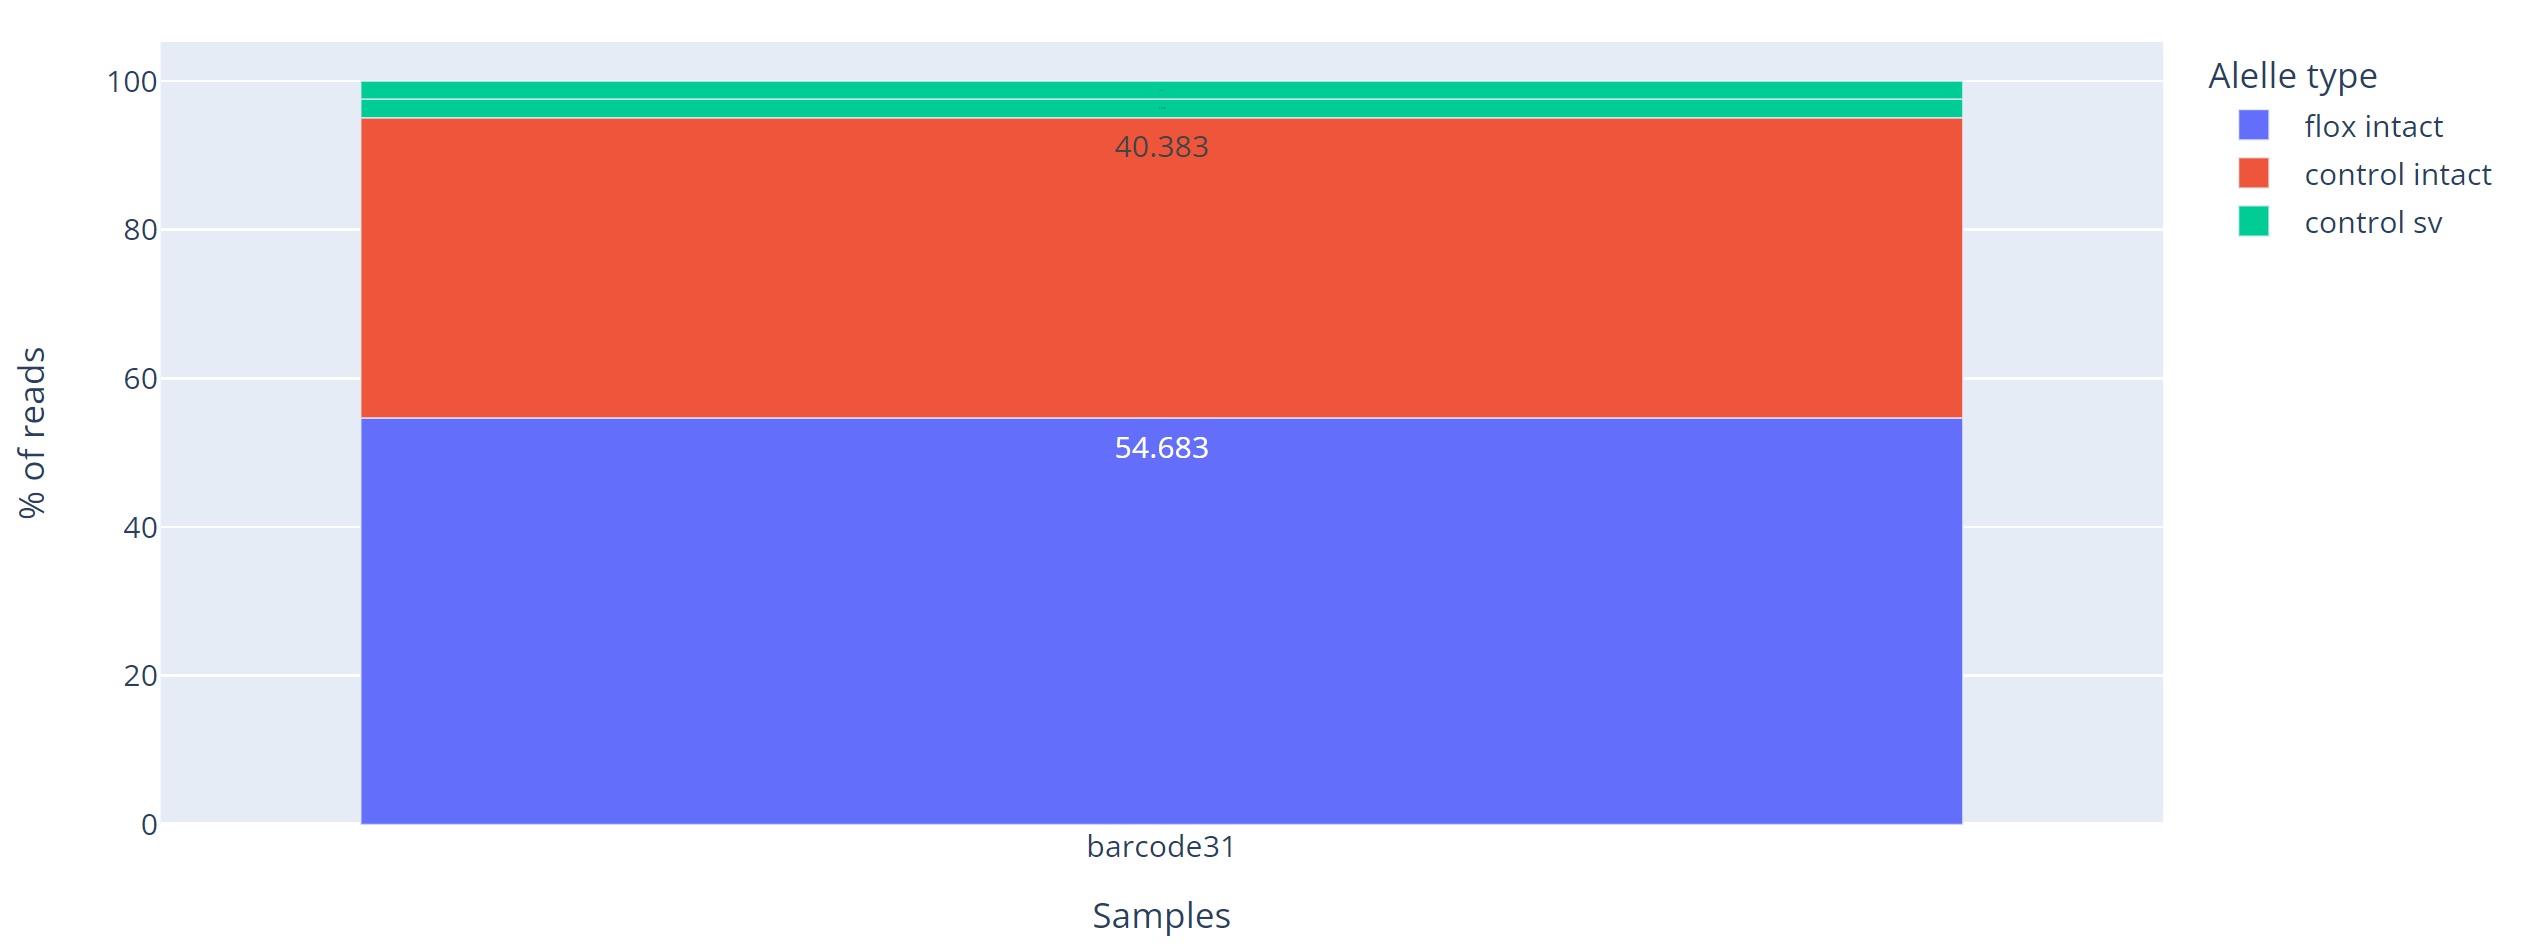

### `DAJIN2 batch`モードをテストします

In [24]:
!rm -rf DAJINResults/tyr-DAJIN2 DAJINResults/.tempdir/tyr-DAJIN2

In [25]:
%%bash
pip install -qe . && DAJIN2 batch -f misc/data/design-dajin2.csv

misc/data/tyr_control.fq.gz is now processing...
misc/data/tyr_albino_50%.fq.gz is now processing...
misc/data/tyr_albino_10%.fq.gz is now processing...
misc/data/tyr_albino_01%.fq.gz is now processing...
Finished! Open DAJINResults/tyr-DAJIN2 to see the report.


- 分類がうまく行っていません…
- `tyr50%`で再挑戦します

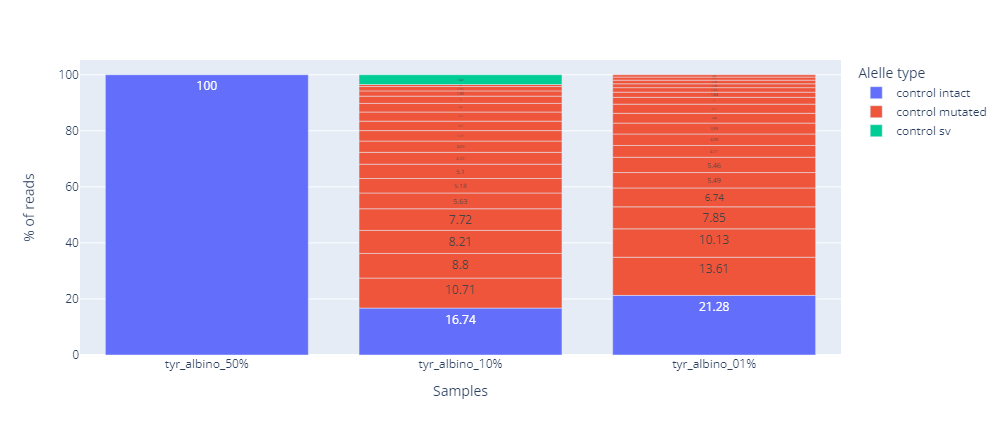

# まとめ


- とりあえず`single`と`batch`を動作させることはできました
    - `postprocess.report.py`などは最終編集が2022年11月ということで半年ほど前だったのですが、意図するように動いており安心しました。
- tyr_albinoで分類・クラスタリングがうまく行っていないようです
    - まずは**`tyr_albino_50%`**で再度検証します

# 次に取り組むこと

### Todo

+ [ ] `tyr_albino_50%`の分類・クラスタリングを検証
+ [ ] 短いリードの扱いをどうするべきか
+ [ ] `SV`の判定をconsensus callのあとにする
+ [ ] cis変異の両端が欠失している場合に、Nで置き換えるとtransとなってしまうのをどうするか（`clustering.replace_both_ends_n`）
+ [ ] Insertionのなかにある変異を同定する手法を考案する
+ [ ] Ayabe-taks1のright_loxpがいまいちな理由を考察する
+ [ ] `preprocess.correct_sequence_error.replace_atmark`のコードがわかりにくい
    + テストを用意してリファクタリングする